In [ ]:
!wget https://github.com/verlab/LearningToDetect_PRL_2023/blob/main/assets/notredame.jpg?raw=true -O notredame.jpg

In [2]:
import cv2, torch
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:

image = cv2.imread("./notredame.jpg")

# get the pretrained model
detector = torch.hub.load("verlab/LearningToDetect_PRL_2023:main", "Detector", pretrained=True, force_reload=True)

# move it to the GPU, if available
detector.to(device)

# detect!
keypoints, score_map = detector.detect(image, 1024)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/verlab/LearningToDetect_PRL_2023/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://github.com/verlab/LearningToDetect_PRL_2023/raw/main/pretrained/our/final_model_1500.pth" to /root/.cache/torch/hub/checkpoints/final_model_1500.pth
100%|██████████| 1.85M/1.85M [00:00<00:00, 48.8MB/s]


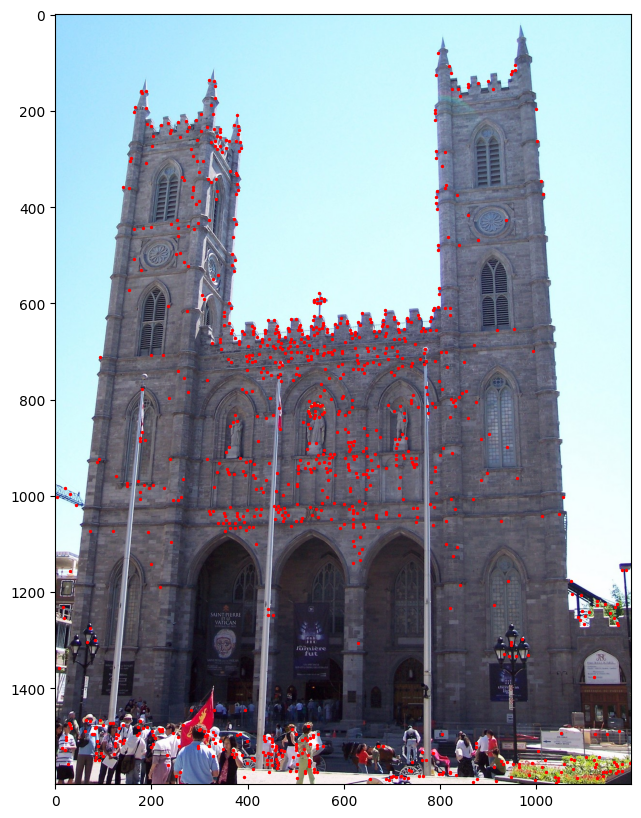

In [14]:
plt.figure(figsize = (10,10))
plt.imshow(image[..., ::-1])
plt.scatter(keypoints[:, 0], keypoints[:, 1], s=2, c='red')
plt.show()

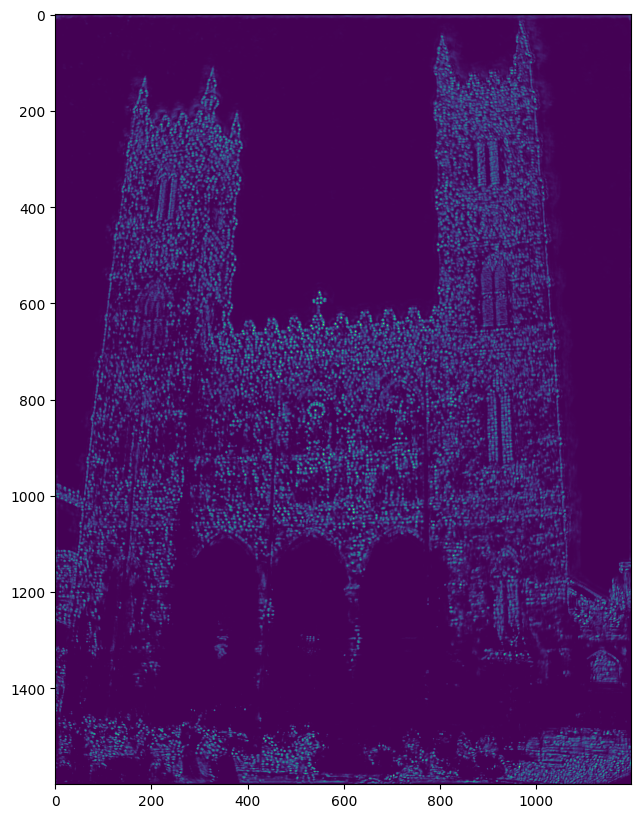

In [15]:
plt.figure(figsize = (10,10))
plt.imshow(score_map)
plt.show()